Epoch 0, Loss: 0.7372300028800964
Epoch 10, Loss: 0.7218461632728577
Epoch 20, Loss: 0.7063590884208679
Epoch 30, Loss: 0.6907712817192078
Epoch 40, Loss: 0.6750922799110413
Epoch 50, Loss: 0.6593368053436279
Epoch 60, Loss: 0.6435239315032959
Epoch 70, Loss: 0.6276743412017822
Epoch 80, Loss: 0.6118101477622986
Epoch 90, Loss: 0.5959543585777283


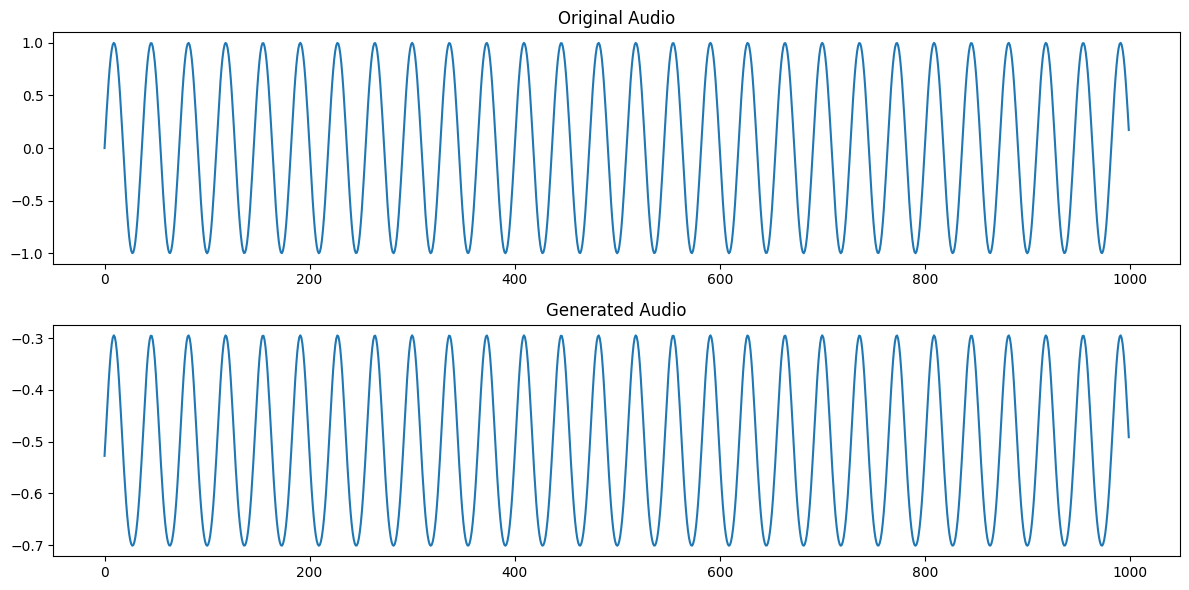

In [ ]:
# This script is still work in progress. 

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define a simple flow-based model
class SimpleFlow(nn.Module):
    def __init__(self, input_dim):
        super(SimpleFlow, self).__init__()
        self.linear = nn.Linear(input_dim, input_dim)
        self.activation = nn.Tanh()

    def forward(self, x):
        z = self.linear(x)
        z = self.activation(z)
        return z

# Generate synthetic audio data (e.g., sine waves)
def generate_sine_wave(frequency, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio = np.sin(2 * np.pi * frequency * t)
    return audio

# Parameters
frequency = 440  
duration = 2.0   
sample_rate = 16000  
input_dim = 1  # Input dimension for the flow model

# Generate sine wave
audio = generate_sine_wave(frequency, duration, sample_rate)
audio_tensor = torch.tensor(audio, dtype=torch.float32).unsqueeze(1)  # Add batch dimension

# Initialize the flow model
model = SimpleFlow(input_dim=input_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model (dummy training loop)
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(audio_tensor)
    loss = torch.mean((output - audio_tensor) ** 2)  # Dummy loss
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Generate new audio using the trained model
with torch.no_grad():
    generated_audio = model(audio_tensor).squeeze().numpy()

# Plot original and generated audio
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("Original Audio")
plt.plot(audio[:1000])  
plt.subplot(2, 1, 2)
plt.title("Generated Audio")
plt.plot(generated_audio[:1000])  
plt.tight_layout()
plt.show()

# Save the original and generated audio
import soundfile as sf
# sf.write('/output/original_audio.wav', audio, sample_rate)
sf.write('../output/generated_audio_FLOW.wav', generated_audio, sample_rate)